In [1]:
%pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ----- ------------------------------- 41.0/282.6 kB 653.6 kB/s eta 0:00:01
     --------------- ---------------------- 112.6/282.6 kB 1.1 MB/s eta 0:00:01
     --------------- -------------------- 122.9/282.6 kB 901.1 kB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### FILTERING WARNINGS

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### IMPORTING & CHECKING DATASET

In [3]:
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Income', 'Spend']
df.head()

,CustomerID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### CLASSIFYING SIMILAR CUSTOMERS ON BASIS OF INCOME AND SPEND

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

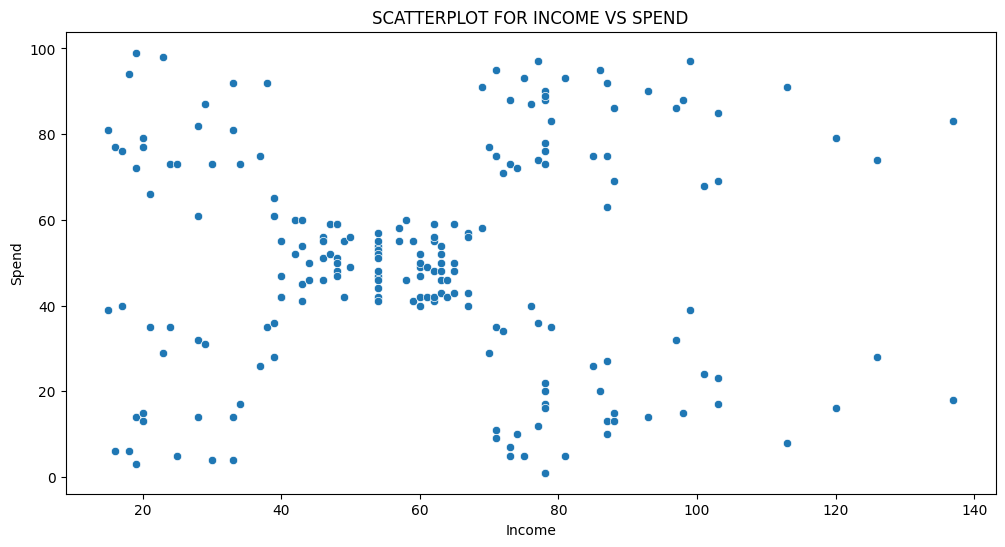

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Income', y='Spend')
plt.title('SCATTERPLOT FOR INCOME VS SPEND')
plt.show()

### SEPERATING X VALUE FROM THE DATA

In [16]:
x= df[['Income', 'Spend']]
x.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### PREPROCESSING THE X DATA

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [19]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [20]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,Income,Spend
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### FOR KMEAN METHOD FIND OPTIMAL VALUE OF L WITH ELBOW METHOD

In [21]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans

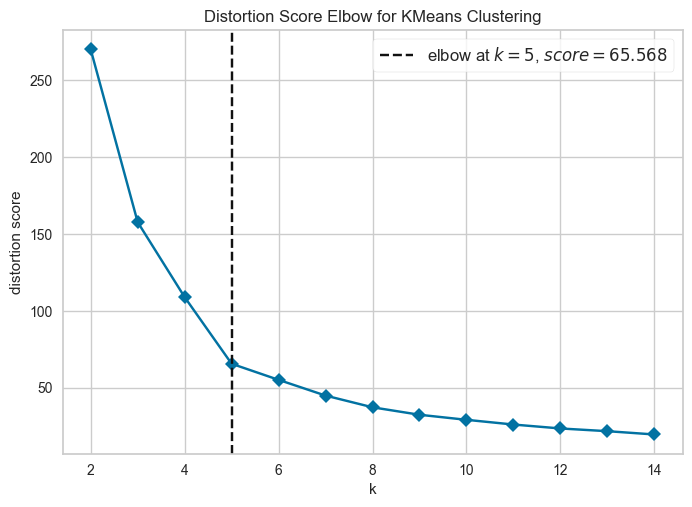

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [22]:
kelbow_visualizer(KMeans(),
                  x_pre,
                  k=(2, 15),
                  timings=False)

### CREATING A KMEANS MODEL WITH NUMBER OF CLUSTERS AS 5

In [23]:
model = KMeans(n_clusters=5)
model.fit(x_pre)

KMeans(n_clusters=5)

In [24]:
model.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [25]:
x.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [26]:
x['Label']= model.labels_

In [27]:
x

,Income,Spend,Label
0,15,39,0
1,15,81,3
2,16,6,0
3,16,77,3
4,17,40,0
...,...,...,...
195,120,79,2
196,126,28,4
197,126,74,2
198,137,18,4


In [28]:
x['Label'].unique()

array([0, 3, 1, 2, 4])

In [31]:
x[x['Label']==0]

,Income,Spend,Label
0,15,39,0
2,16,6,0
4,17,40,0
6,18,6,0
8,19,3,0
10,19,14,0
12,20,15,0
14,20,13,0
16,21,35,0
18,23,29,0


In [32]:
x[x['Label']==1]

,Income,Spend,Label
43,39,61,1
46,40,55,1
47,40,47,1
48,40,42,1
49,40,42,1
...,...,...,...
121,67,40,1
122,69,58,1
126,71,35,1
132,72,34,1


In [33]:
x[x['Label']==2]

,Income,Spend,Label
123,69,91,2
125,70,77,2
127,71,95,2
129,71,75,2
131,71,75,2
133,72,71,2
135,73,88,2
137,73,73,2
139,74,72,2
141,75,93,2


In [34]:
x[x['Label']==3]

,Income,Spend,Label
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3


In [35]:
x[x['Label']==4]

,Income,Spend,Label
124,70,29,4
128,71,11,4
130,71,9,4
134,73,5,4
136,73,7,4
138,74,10,4
140,75,5,4
144,77,12,4
146,77,36,4
148,78,22,4


### VISUALIZING ABOVE CLUSTERS

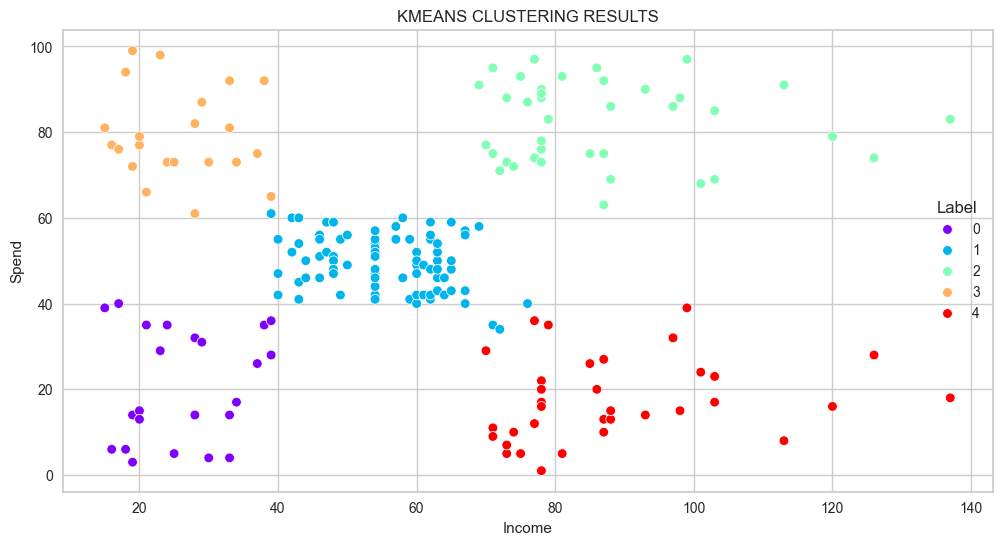

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=x, x='Income', y='Spend', hue='Label', palette='rainbow')
plt.title('KMEANS CLUSTERING RESULTS')
plt.show()

### CLUSTER SIMILAR CUSTOMERS ON BASIS OF AGE, INCOME AND SPEND

In [37]:
x2 = df[['Age', 'Income', 'Spend']]
x2

,Age,Income,Spend
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [39]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())]).set_output(transform='pandas')

In [42]:
x2_pre = num_pipe2.fit_transform(x2)
x2_pre.head()

,Age,Income,Spend
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


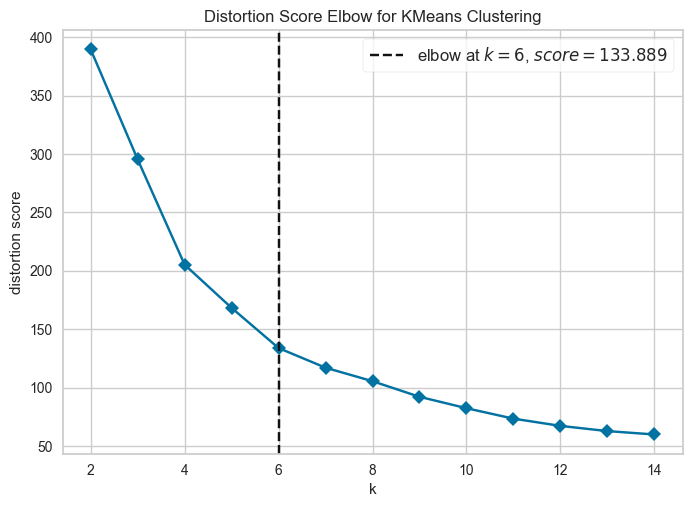

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [43]:
kelbow_visualizer(KMeans(),
                  x2_pre,
                  k=(2, 15),
                  timings=False)

In [44]:
model2 = KMeans(n_clusters=6)
model2.fit(x2_pre)

KMeans(n_clusters=6)

In [45]:
model2.labels_

array([5, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 0, 5, 2, 5,
       2, 5, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 4, 3, 4, 3, 4, 3,
       1, 3, 4, 3, 4, 3, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [46]:
x2['Label']= model2.labels_

In [47]:
x2.head()

,Age,Income,Spend,Label
0,19,15,39,5
1,21,15,81,5
2,20,16,6,2
3,23,16,77,5
4,31,17,40,2


In [48]:
x2['Label'].unique()

array([5, 2, 0, 1, 3, 4])

In [50]:
for i in range(6):
    print(f'cluster number : {i}\n')
    display(x2[x2['Label']==i])
    print('\n===========================================================\n')

cluster number : 0



,Age,Income,Spend,Label
40,65,38,35,0
46,50,40,55,0
50,49,42,52,0
53,59,43,60,0
54,50,43,45,0
55,47,43,41,0
56,51,44,50,0
57,69,44,46,0
59,53,46,46,0
60,70,46,56,0




cluster number : 1



,Age,Income,Spend,Label
47,27,40,47,1
48,29,40,42,1
49,31,40,42,1
51,33,42,60,1
52,31,43,54,1
58,27,46,51,1
61,19,46,55,1
65,18,48,59,1
68,19,48,59,1
69,32,48,47,1




cluster number : 2



,Age,Income,Spend,Label
2,20,16,6,2
4,31,17,40,2
6,35,18,6,2
8,64,19,3,2
10,67,19,14,2
12,58,20,15,2
14,37,20,13,2
16,35,21,35,2
18,52,23,29,2
20,35,24,35,2




cluster number : 3



,Age,Income,Spend,Label
123,39,69,91,3
125,31,70,77,3
127,40,71,95,3
129,38,71,75,3
131,39,71,75,3
133,31,72,71,3
135,29,73,88,3
137,32,73,73,3
139,35,74,72,3
141,32,75,93,3




cluster number : 4



,Age,Income,Spend,Label
126,43,71,35,4
128,59,71,11,4
130,47,71,9,4
134,20,73,5,4
136,44,73,7,4
140,57,75,5,4
144,25,77,12,4
146,48,77,36,4
148,34,78,22,4
150,43,78,17,4




cluster number : 5



,Age,Income,Spend,Label
0,19,15,39,5
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5


### INSTALLING PLOTLY AND NBFORMAT

In [51]:
%pip install plotly nbformat


   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/15.6 MB 3.3 MB/s eta 0:00:05
    --------------------------------------- 0.3/15.6 MB 2.9 MB/s eta 0:00:06
   - -------------------------------------- 0.5/15.6 MB 3.3 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/15.6 MB 4.1 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/15.6 MB 5.0 MB/s eta 0:00:03
   --- ------------------------------------ 1.5/15.6 MB 5.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/15.6 MB 5.5 MB/s eta 0:00:03
   ----- ---------------------------------- 2.2/15.6 MB 5.9 MB/s eta 0:00:03
   ------ --------------------------------- 2.6/15.6 MB 6.2 MB/s eta 0:00:03
   ------- -------------------------------- 2.9/15.6 MB 6.5 MB/s eta 0:00:02
   -------- ------------------------------- 3.4/15.6 MB 6.5 MB/s eta 0:00:02
   --------- ------------------------------ 3.9/15.6 MB 6.8 MB/s eta 0:00:02
   --


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### VISUALIZING THE 3D SCATTERPLOT FOR CLUSTERING

In [52]:
import plotly.express as px

In [54]:
fig = px.scatter_3d(data_frame=x2, x='Age', y='Income', z='Spend', color='Label')
fig.show()